In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_inference = pd.DataFrame(data=[
    {
        "model": "0.5B",
        "img_size": 256,
        "inferences_per_second": 32.18,
        "success_rate_inference_valid": 6884 / 6919,
        "success_rate_category": 9 / 20,
        "success_rate_rating": 17 / 20,
    },
    {
        "model": "0.5B",
        "img_size": 384,
        "inferences_per_second": 32.49,
        "success_rate_inference_valid": 6891 / 6921,
        "success_rate_category": 12 / 20,
        "success_rate_rating": 17 / 20,
    },
    {
        "model": "0.5B",
        "img_size": 512,
        "inferences_per_second": 25.07,
        "success_rate_inference_valid": 7010 / 7045,
        "success_rate_category": 13 / 20,
        "success_rate_rating": 15 / 20,
    },
    {
        "model": "7B",
        "img_size": 256,
        "inferences_per_second": 13.08,
        "success_rate_inference_valid": 6913 / 6919,
        "success_rate_category": 16 / 20,
        "success_rate_rating": 16 / 20,
    },
    {
        "model": "7B",
        "img_size": 336,
        "inferences_per_second": 13.02,
        "success_rate_inference_valid": 6945 / 6921,
        "success_rate_category": 15 / 20,
        "success_rate_rating": 16 / 20,
    },
    {
        "model": "7B",
        "img_size": 384,
        "inferences_per_second": 13.03,
        "success_rate_inference_valid": 6912 / 6921,
        "success_rate_category": 14 / 20,
        "success_rate_rating": 15 / 20,
    },
    {
        "model": "7B",
        "img_size": 512,
        "inferences_per_second": 8.2,
        "success_rate_inference_valid": 7039 / 7045,
        "success_rate_category": 16 / 20,
        "success_rate_rating": 15 / 20,
    }
])

df_gpu_performance = pd.DataFrame(data=[
    {
        "model": "0.5B",
        "img_size": 256,
        "dataset_size": 3576,
        "gpus": 1,
        "dp_mode": "default",
        "inferences_per_second": 3576 / 157.45,
    },
    {
        "model": "0.5B",
        "img_size": 256,
        "dataset_size": 3576,
        "gpus": 2,
        "dp_mode": "default",
        "inferences_per_second": 3576 / 99.31,
    },
    {
        "model": "0.5B",
        "img_size": 256,
        "dataset_size": 6919,
        "gpus": 8,
        "dp_mode": "default",
        "inferences_per_second": 6919 / 178.68,
    },
    {
        "model": "7B",
        "img_size": 256,
        "dataset_size": 6919,
        "gpus": 1,
        "dp_mode": "router",
        "inferences_per_second": 6919 / 1432.27,
    },
    {
        "model": "7B",
        "img_size": 256,
        "dataset_size": 6919,
        "gpus": 2,
        "dp_mode": "router",
        "inferences_per_second": 6919 / 792.64,
    },
    {
        "model": "7B",
        "img_size": 256,
        "dataset_size": 6919,
        "gpus": 4,
        "dp_mode": "router",
        "inferences_per_second": 6919 / 386.07,
    },
    # {
    #     "model": "7B",
    #     "img_size": 256,
    #     "dataset_size": 6919,
    #     "gpus": 4,
    #     "dp_mode": "default",
    #     "inferences_per_second": 6919 / 529.07,
    # },
    {
        "model": "7B",
        "img_size": 256,
        "dataset_size": 6919,
        "gpus": 8,
        "dp_mode": "router",
        "inferences_per_second": 6919 / 247.51,
    },
])

sns.set(style="whitegrid")

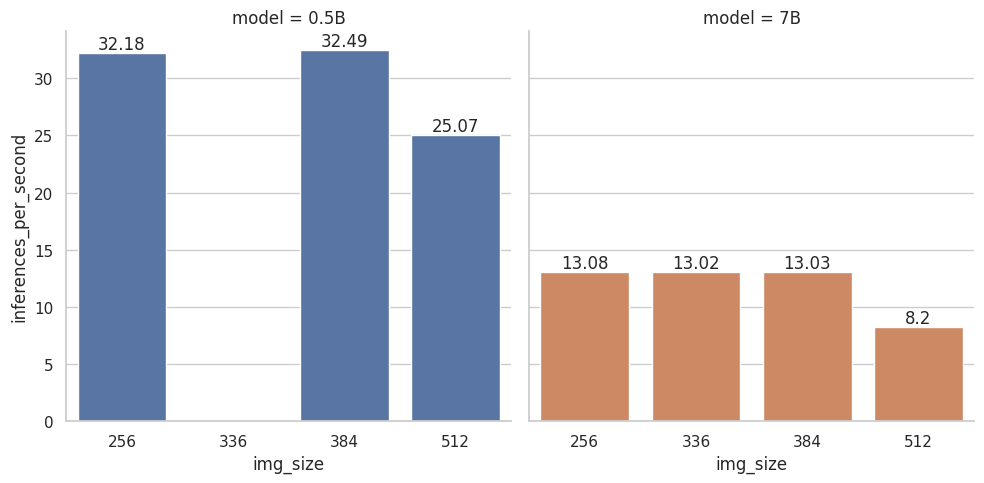

In [3]:
g = sns.catplot(
    data=df_inference,
    x="img_size",
    y="inferences_per_second",
    col="model",
    kind="bar",
    hue="model",
    legend=False
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c)

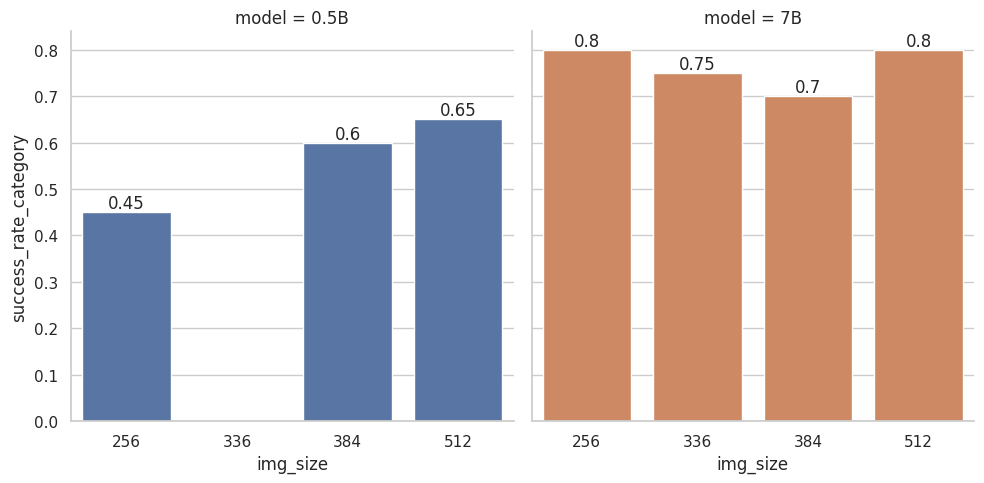

In [4]:
g = sns.catplot(
    data=df_inference,
    x="img_size",
    y="success_rate_category",
    col="model",
    kind="bar",
    hue="model",
    legend=False
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c)

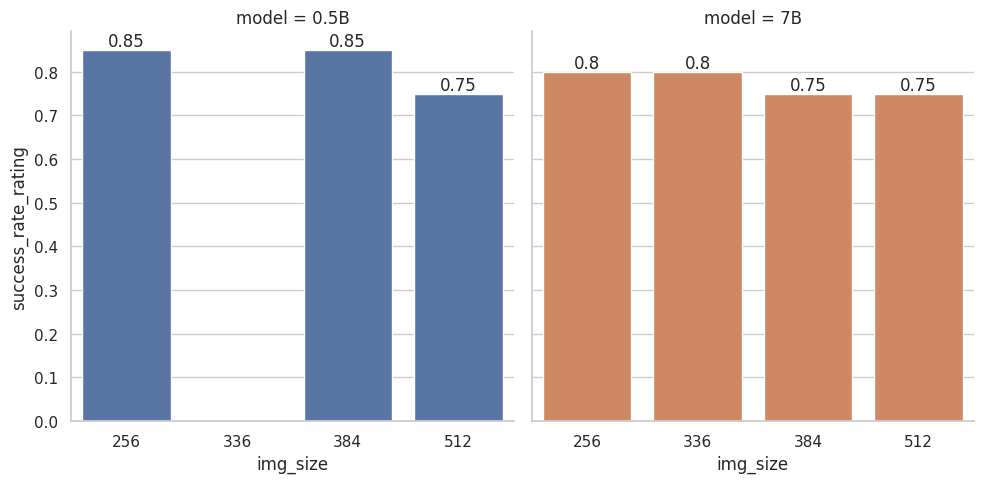

In [5]:
g = sns.catplot(
    data=df_inference,
    x="img_size",
    y="success_rate_rating",
    col="model",
    kind="bar",
    hue="model",
    legend=False
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c)

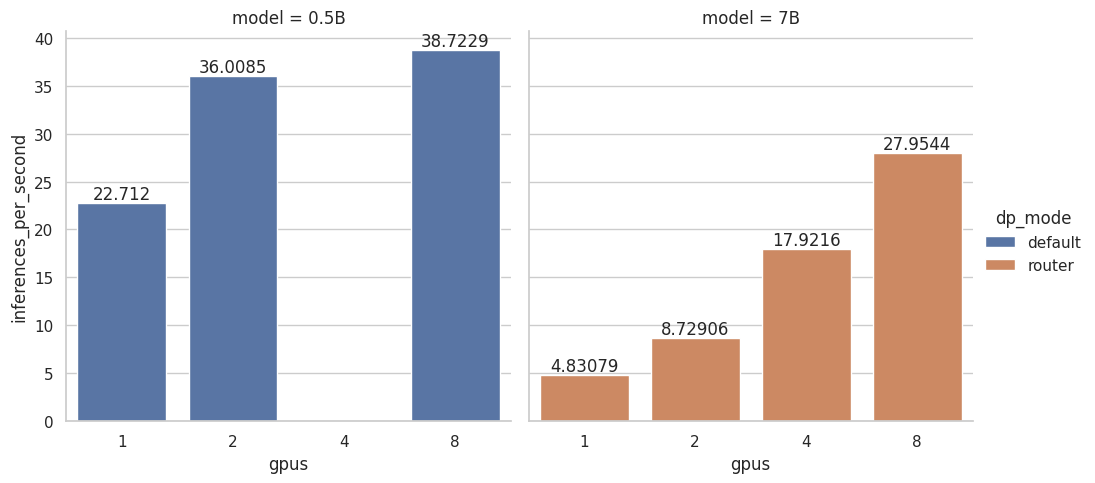

In [9]:
# g = sns.barplot(
#     data=df_gpu_performance,
#     x="gpus",
#     y="inferences_per_second",
#     legend=False
# )

g = sns.catplot(
    data=df_gpu_performance,
    x="gpus",
    y="inferences_per_second",
    col="model",
    kind="bar",
    hue="dp_mode",
    legend=True
)

for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c)

In [23]:
import json

def visualize_summarized_annotations(summary_path: str):
    with open(summary_path, 'r', encoding='utf-8') as file:
        summary = json.load(file)
        data = []

        for category, ids_dict in summary["categories"].items():
            safe_count = len(ids_dict["safe_ids"])
            unsafe_count = len(ids_dict["unsafe_ids"])
            data.append({"Category": category, "Count": safe_count, "Rating": "Safe"})
            data.append({"Category": category, "Count": unsafe_count, "Rating": "Unsafe"})
        
        # Convert to a DataFrame
        df = pd.DataFrame(data)
        
        # Plot using seaborn
        ax = sns.barplot(
            data=df, 
            x="Category", 
            y="Count", 
            hue="Rating",
        )

        ax.set_yscale("log")
        plt.title("Count of Safe and Unsafe IDs per Category (7B-512)")
        plt.xticks(rotation=45, ha='right')
        plt.xlabel("Categories")

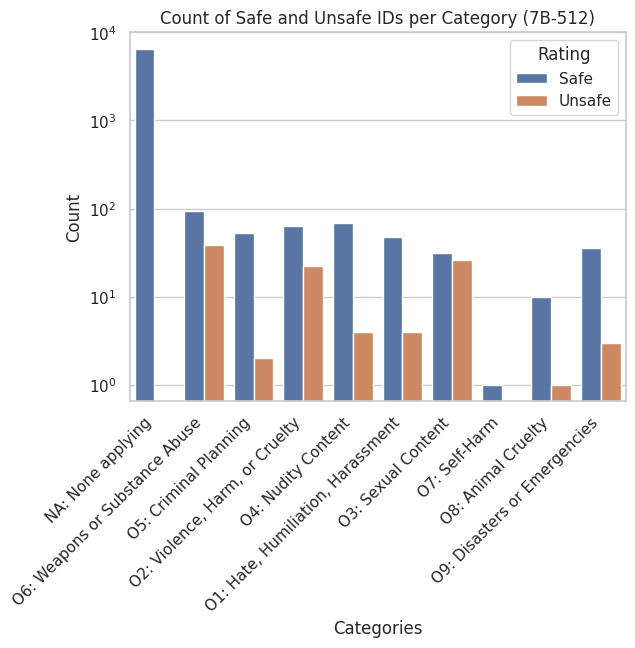

In [24]:
# df_inference_qualitative = pd.read_json("/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter/finngu/LlavaGuard/src/experiments/compare_annotations/results/results_500M_laion2B-en_test_10000_256_12_09_01.json")
visualize_summarized_annotations("/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter/finngu/LlavaGuard/src/experiments/compare_annotations/results/results_7B_laion2B-en_test_10000_512_12_10_01.json")

In [66]:
def compare_summaries(summary1_path: str, summary2_path: str):
    """
    Compares two summary files and plots a stacked bar chart to show the category distribution
    of IDs from the first summary in terms of categories in the second summary.

    Parameters:
        summary1_path (str): Path to the first summary JSON file.
        summary2_path (str): Path to the second summary JSON file.
    """
    # Load both summary files
    with open(summary1_path, 'r', encoding='utf-8') as file1, open(summary2_path, 'r', encoding='utf-8') as file2:
        summary1 = json.load(file1)
        summary2 = json.load(file2)
    
    # Create a mapping of IDs to categories from the second summary
    id_to_category2 = {}
    for category, ids_dict in summary2["categories"].items():
        for id_ in ids_dict["safe_ids"] + ids_dict["unsafe_ids"]:
            id_to_category2[id_] = category
    
    # Prepare data for comparison
    comparison_data = {category: {cat2: 0 for cat2 in summary2["categories"].keys()} 
                       for category in summary1["categories"].keys()}
    
    for category1, ids_dict in summary1["categories"].items():
        ids_in_category1 = ids_dict["safe_ids"] + ids_dict["unsafe_ids"]
        for id_ in ids_in_category1:
            if id_ in id_to_category2:  # Check if the ID exists in the second summary
                category2 = id_to_category2[id_]
                comparison_data[category1][category2] += 1

    # Convert the data to a DataFrame
    data = []
    for category1, category2_counts in comparison_data.items():
        for category2, count in category2_counts.items():
            data.append({"Category1": category1, "Category2": category2, "Count": count})
    df = pd.DataFrame(data)
    
    # Format category names for better readability
    df["Category2"] = df["Category2"].apply(lambda x: "\n".join(x.split(", ")))
    
    # Pivot for a stacked bar chart and ensure all categories are represented
    pivot_df = df.pivot(index="Category1", columns="Category2", values="Count").reindex(
        index=sorted(df["Category1"].unique()),
        columns=[cat for cat in df["Category2"].unique()],
        fill_value=0
    )

    # Sort columns (stacking order) by descending total counts across all rows
    column_totals = pivot_df.sum(axis=0).sort_values(ascending=False)
    pivot_df = pivot_df[column_totals.index]
    
    # Plot stacked bar chart
    ax = pivot_df.plot(
        kind="bar", 
        stacked=True
    )

    ax.set_yscale("log")
    plt.title("Similarity of Inference (7B-512 and 500M-512)")
    plt.ylabel("Count of IDs")
    plt.xlabel("Categories 7B")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Categories 500M", bbox_to_anchor=(1.05, 1), loc='upper left')


    print(df[df["Category1"]=="O1: Hate, Humiliation, Harassment"])
    print(df[df["Category1"]=="O8: Animal Cruelty"])

                            Category1                          Category2  \
50  O1: Hate, Humiliation, Harassment                  NA: None applying   
51  O1: Hate, Humiliation, Harassment                 O3: Sexual Content   
52  O1: Hate, Humiliation, Harassment  O1: Hate\nHumiliation\nHarassment   
53  O1: Hate, Humiliation, Harassment     O6: Weapons or Substance Abuse   
54  O1: Hate, Humiliation, Harassment              O5: Criminal Planning   
55  O1: Hate, Humiliation, Harassment     O2: Violence\nHarm\nor Cruelty   
56  O1: Hate, Humiliation, Harassment                      O7: Self-Harm   
57  O1: Hate, Humiliation, Harassment                 O4: Nudity Content   
58  O1: Hate, Humiliation, Harassment                 O8: Animal Cruelty   
59  O1: Hate, Humiliation, Harassment       O9: Disasters or Emergencies   

    Count  
50     11  
51      0  
52     35  
53      1  
54      2  
55      1  
56      0  
57      0  
58      0  
59      0  
             Category1         

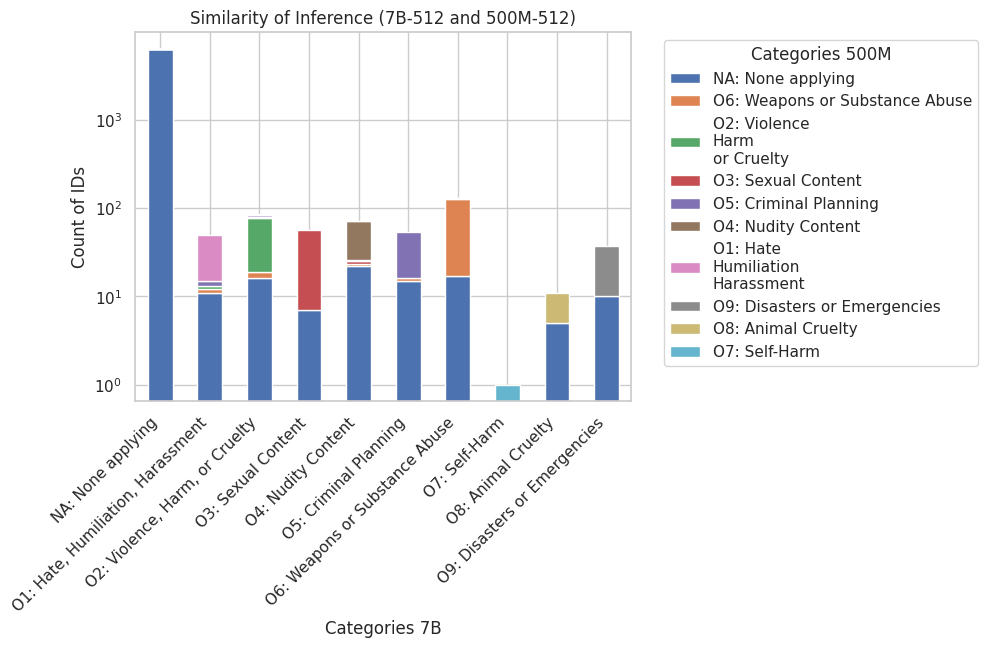

In [67]:
compare_summaries(
        "/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter/finngu/LlavaGuard/src/experiments/compare_annotations/results/results_7B_laion2B-en_test_10000_512_12_10_01.json",
        "/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter/finngu/LlavaGuard/src/experiments/compare_annotations/results/results_7B_laion2B-en_test_10000_384_12_10_02.json"
        # "/pfss/mlde/workspaces/mlde_wsp_KIServiceCenter/finngu/LlavaGuard/src/experiments/compare_annotations/results/results_500M_laion2B-en_test_10000_512_12_10_00.json"
    )